<a href="https://colab.research.google.com/github/arn97/MLTSA25_ARoy/blob/main/MLTSA_ARoy/HW7_ARoy_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series clustering exercise

# Data

The data is on the github repo. It can also be gotten directly from the Census Boureau and from NYC open data.

Each file is the economic census for 1 year.
Download it programmatically and move it to PUIdata

data link https://github.com/fedhere/MLTSA_FBianco/blob/main/data/nyc_zpb_est_1994_2014.csv



make sure yuo read it so that the index column is the zipcode

In [40]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gp
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import missingno as mno
from sklearn.preprocessing import StandardScaler


In [41]:
# read in the business data: this is the number of licenced business per zipcode in NYC from 1994 through 2014
df = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/main/data/nyc_zpb_est_1994_2014.csv', index_col=0)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check. you should have 21(N_timestamps) datapoints per time series and about 239 zipcodes (Nzipcodes)

- drop all rows with 10 missing values or more
- impute missing values using k nearest neighbors with k=5 (you can use AI prompts to do that)


mydata.shape should be (Nzipcodes, Ntimestamps)



In [42]:
df.shape

(248, 21)

<Axes: >

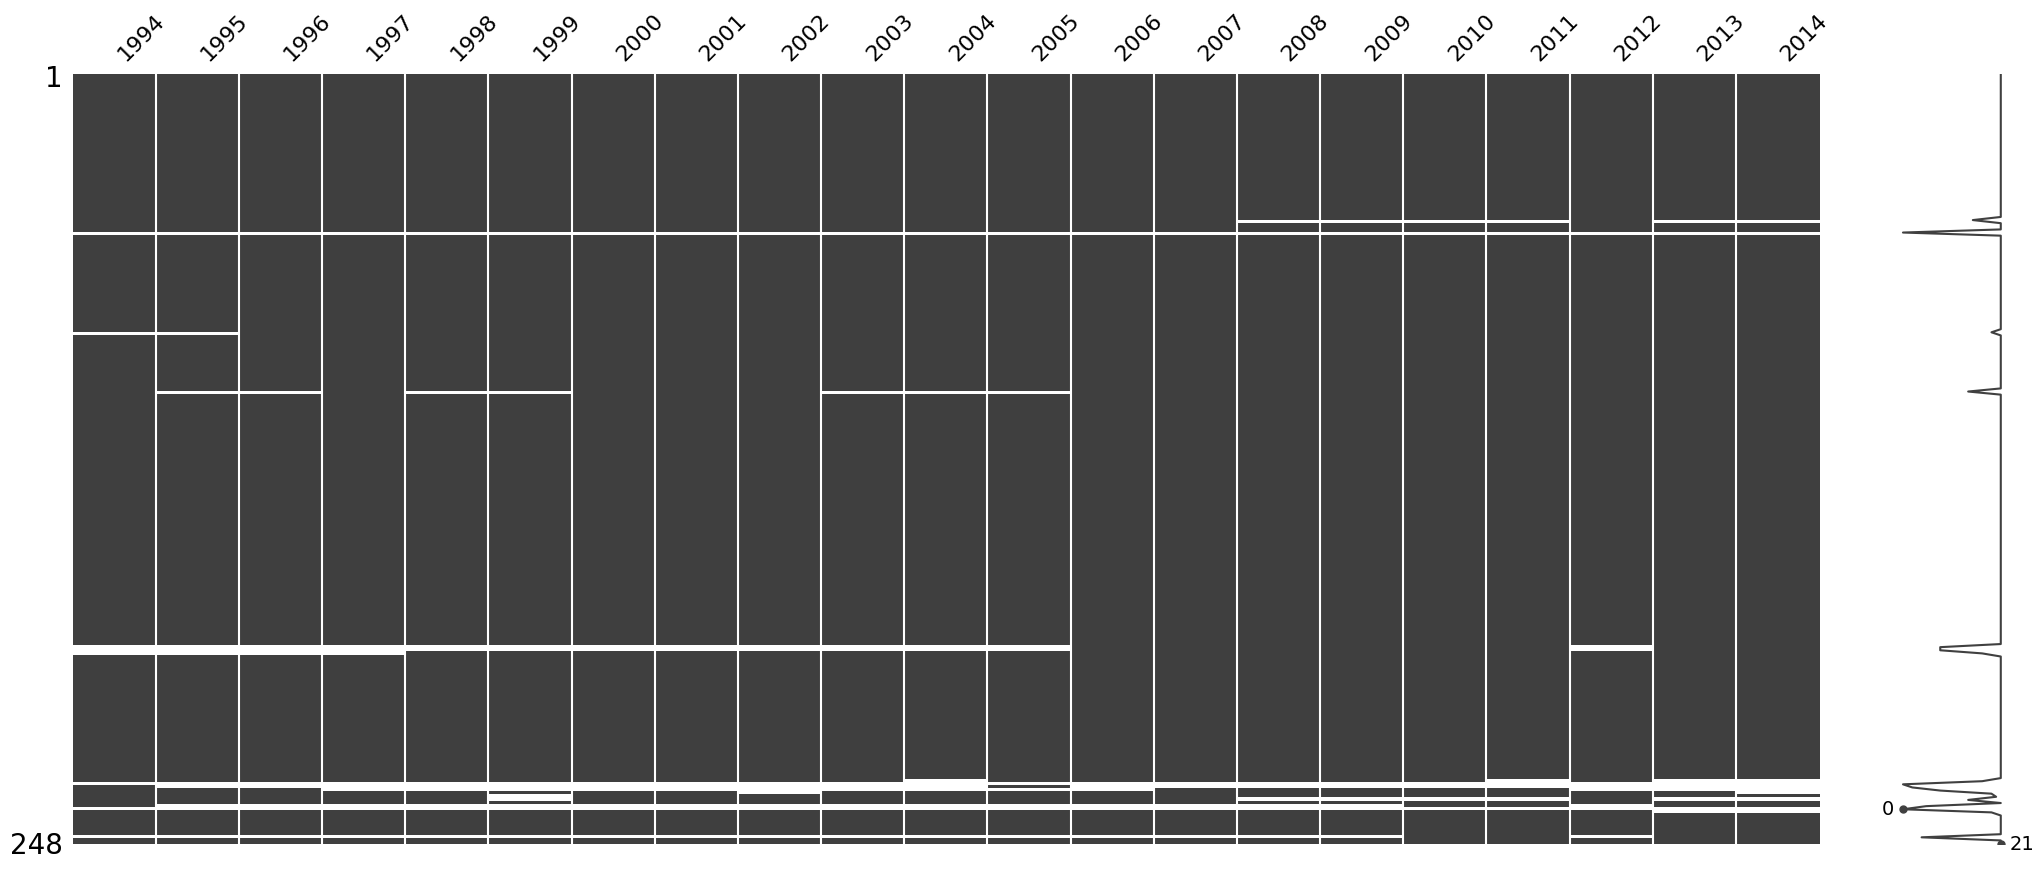

In [43]:
mno.matrix(df)

CAPTION: Missing data matrix visualization of the dataset from $1994$ to $2014$. Each column represents a year and each row corresponds to a unique observation. Dark cells indicate present values, while white gaps denote missing data. The sparkline on the right shows the completeness of each row, with noticeable sparsity concentrated in the earlier rows and select years.

<Axes: >

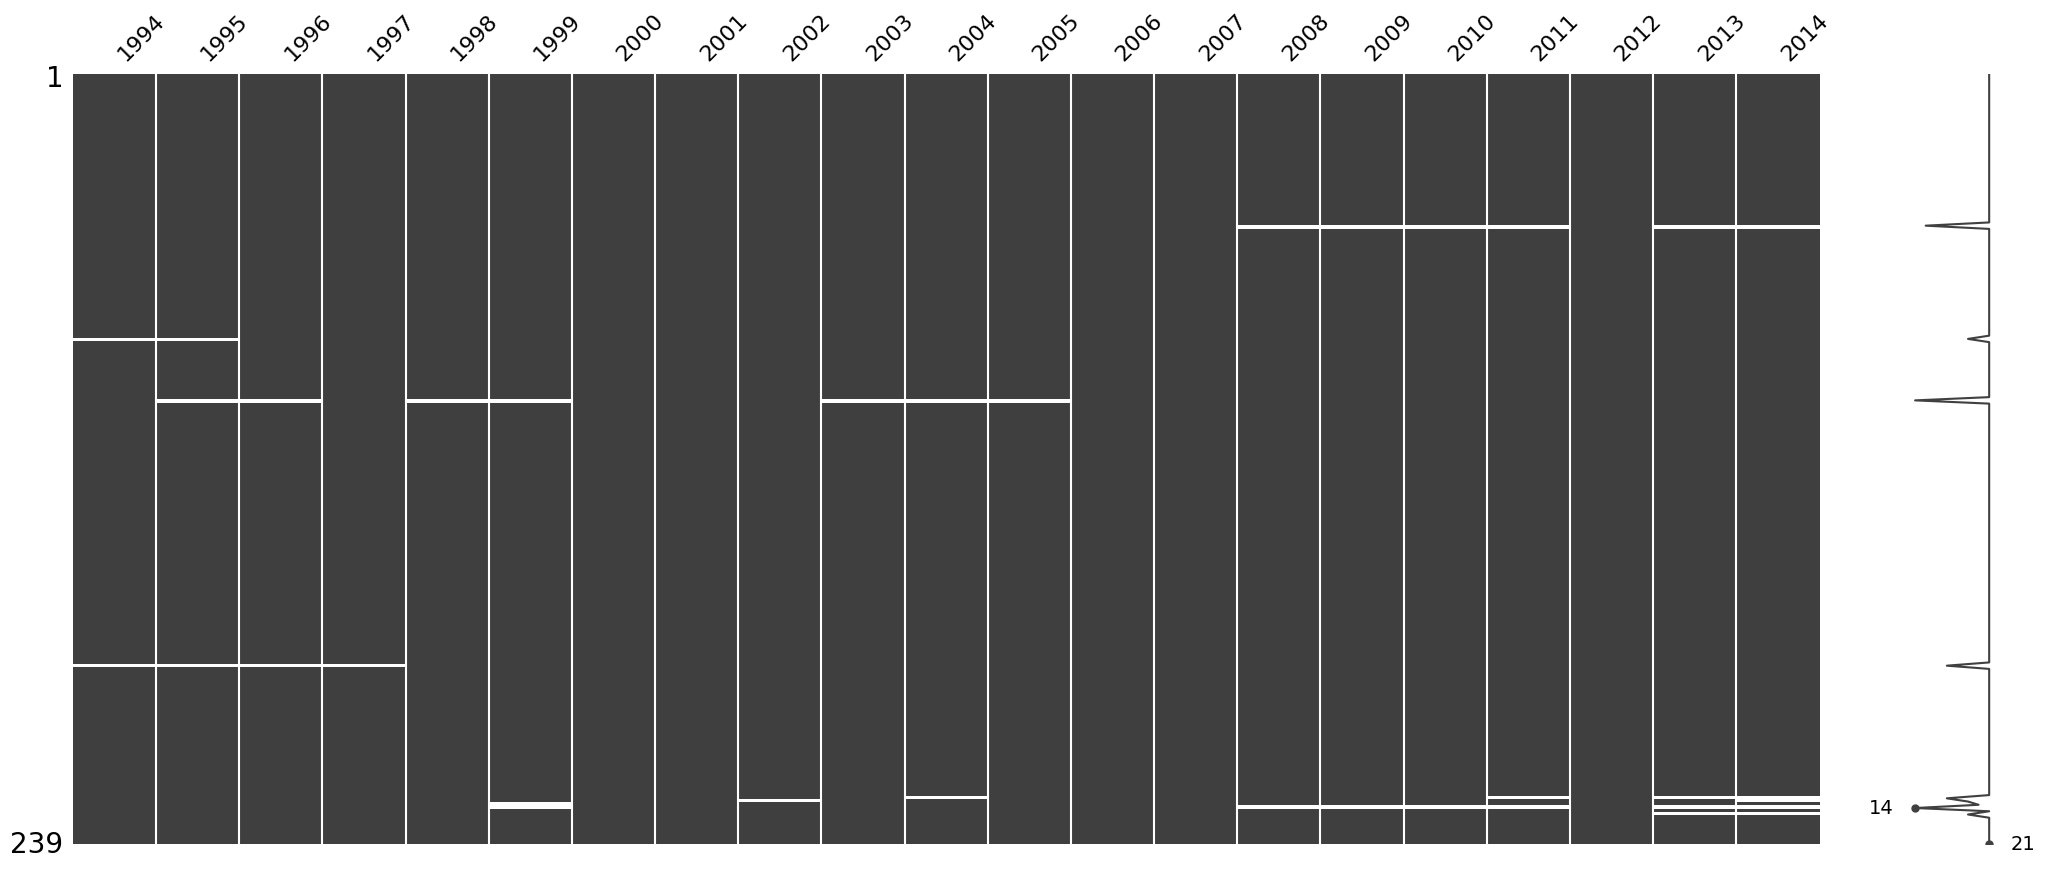

In [44]:
df.dropna(thresh=df.shape[1] - 10, inplace=True)
mno.matrix(df)

CAPTION:Missing data matrix after applying the first filter. Rows with more than $10$ missing values have been dropped, resulting in a cleaner dataset with $239$ remaining entries. The matrix shows improved completeness across most years (columns), with remaining gaps concentrated in a few rows and select years. The sparkline on the right confirms higher overall data density per row.

In [45]:
# prompt:  impute missing values in df using k-nearest neighbors with k=5.

imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data to impute missing values
df_imputed = imputer.fit_transform(df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, index=df.index, columns=df.columns)

# Now df_imputed contains the data with imputed missing values
df_imputed.head()


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


In [46]:
df_imputed.shape

(239, 21)

<Axes: >

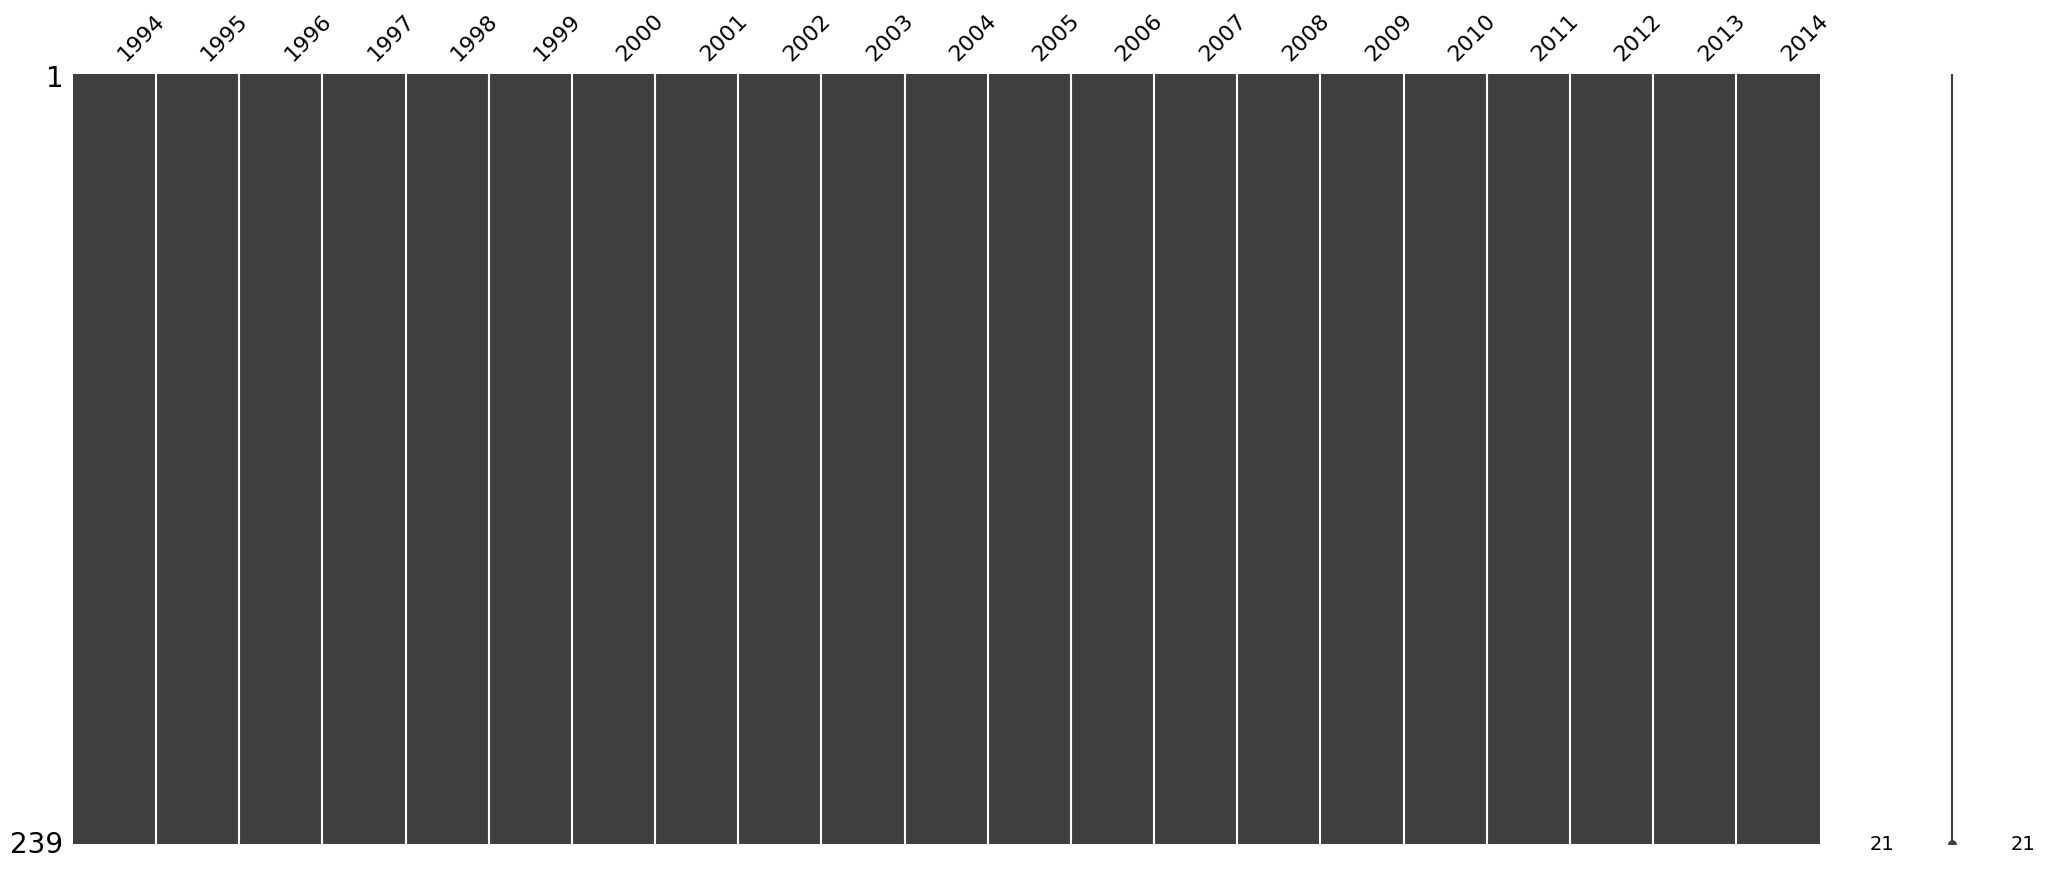

In [47]:
mno.matrix(df_imputed)

CAPTION: Missing data matrix after imputing missing values using the K-Nearest Neighbors (KNN) method with $k=5$. All previously missing entries have been successfully filled, resulting in a completely dense dataset of $239$ rows and full coverage across all years $(1994–2014)$. The absence of white gaps and a flat sparkline confirm the imputation's effectiveness.

# get the zipcodes shape file
by cloning the repo https://github.com/wimlds/smart_cities.git


In [48]:
!git clone https://github.com/wimlds/smart_cities.git

fatal: destination path 'smart_cities' already exists and is not an empty directory.


original data (263, 13)
after cleaning (248, 13)
ZIPCODES: 248 POLYGONS: 248 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 248


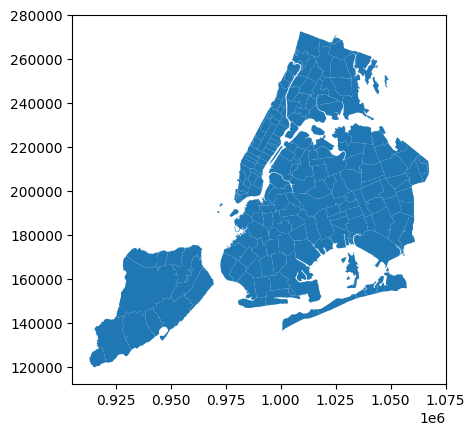

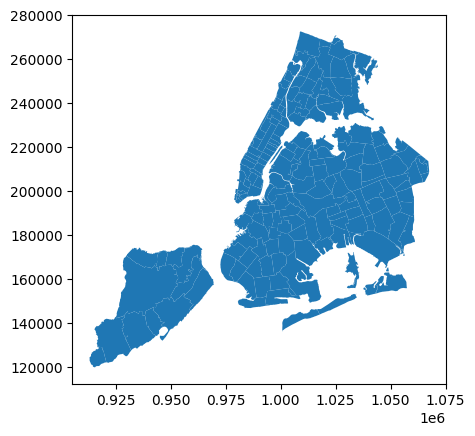

In [68]:
#look at the code and the plots below : I am using geopandas to plot maps of zipcodes from a shapefile and I am removing duplicate entries that have the same zipcode

nyczipsshp = gp.read_file( "smart_cities/NYC_shapefiles/ZIP_CODE_040114.zip")
print("original data", nyczipsshp.shape)
nyczipsshp.plot()

nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
print("after cleaning", nyczipsshp.shape)
nyczipsshp.plot()

print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

## TASKS:
    
    1. Scale and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to
    decide what a good number is here. try a few options, keeping in mind
    a few is more than a couple, but i recommand you stay within the
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of
    the clusters). you can plot for example the cluster centers overlayed on
    each time series (using the alpha channel to control the opacity in the
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is
    an exploratory tool so you do not want to jump to conclusions because
    you see some clusters! but seeing structure in your data can inform
    your next moves as an investigator.
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris.
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.*

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [50]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_imputed.values.T).T,
    index=df_imputed.index,
    columns=df_imputed.columns
)

scaler.mean_

array([7.44761905e+01, 5.51333333e+02, 5.85428571e+02, 4.86857143e+02,
       1.28552381e+03, 1.01100000e+03, 2.23095238e+03, 8.65809524e+02,
       1.82409524e+03, 1.68838095e+03, 3.91333333e+02, 2.85238095e+02,
       5.86476190e+02, 9.87095238e+02, 9.85095238e+02, 3.16714286e+02,
       1.48619048e+02, 5.98476190e+02, 7.24142857e+02, 9.92142857e+02,
       5.26333333e+02, 9.15285714e+02, 9.77476190e+02, 5.03285714e+02,
       5.45523810e+02, 4.57238095e+02, 1.17271429e+03, 6.72523810e+02,
       4.37571429e+02, 6.86571429e+02, 5.92142857e+02, 4.82428571e+02,
       4.64285714e+02, 5.70047619e+02, 1.31571429e+02, 4.94619048e+02,
       7.25952381e+02, 3.21952381e+02, 2.10952381e+02, 8.24095238e+02,
       6.05238095e+02, 5.83000000e+02, 1.64571429e+02, 1.92561905e+03,
       5.33047619e+02, 2.71714286e+02, 4.68285714e+02, 5.87133333e+02,
       1.85004762e+03, 8.72238095e+02, 7.96285714e+02, 6.25190476e+02,
       6.38095238e+00, 3.50285714e+02, 8.38619048e+02, 1.63909524e+03,
      

In [51]:
vals = scaler.transform(df_imputed.values.T).T
vals.mean(axis=1), vals.mean(axis=1).shape

(array([-2.85485921e-16, -3.38353684e-16, -2.11471052e-16,  3.38353684e-16,
        -4.86383420e-16, -2.11471052e-17,  6.66133815e-16, -4.75809868e-16,
         1.16309079e-16,  4.01794999e-16,  8.24737104e-16, -3.38353684e-16,
        -3.17206578e-16,  3.38353684e-16,  4.86383420e-16, -2.32618158e-16,
        -2.85485921e-16, -7.40148683e-17,  5.07530526e-16,  7.61295788e-16,
        -8.88178420e-16, -8.56457762e-16, -1.05735526e-16,  2.11471052e-16,
         1.48029737e-16, -6.34413157e-17, -1.20538500e-15,  8.45884209e-17,
         2.53765263e-16,  2.43191710e-16,  3.91221447e-16, -1.79750394e-16,
         2.11471052e-16,  1.16309079e-16, -3.27780131e-16,  6.34413157e-16,
        -2.32618158e-16, -4.01794999e-16, -4.01794999e-16,  2.74912368e-16,
         9.72766841e-16,  9.51619735e-17, -4.22942105e-16, -9.04038749e-16,
         2.32618158e-16, -6.34413157e-17,  1.05735526e-16,  8.98751972e-17,
         3.17206578e-17,  9.72766841e-16, -3.48927236e-16,  5.18104078e-16,
        -1.7

In [52]:
vals.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (248,)

vals.std(axis=1) should return 1 everywhere



# KM Clustering

create a kmeans model with 5 clusters

In [53]:
nc = 5
km = KMeans(n_clusters=nc, random_state=302).fit(vals)


### Plot and map the clusters.

First reflect on this: the center of a cluster is a point within the cluster. If your cluster is a cluster of time series its center is... A TIME SERIES! so your cluster centers should be time series of 21 points (1995-2015)

The cluster centers are extracted as km.center

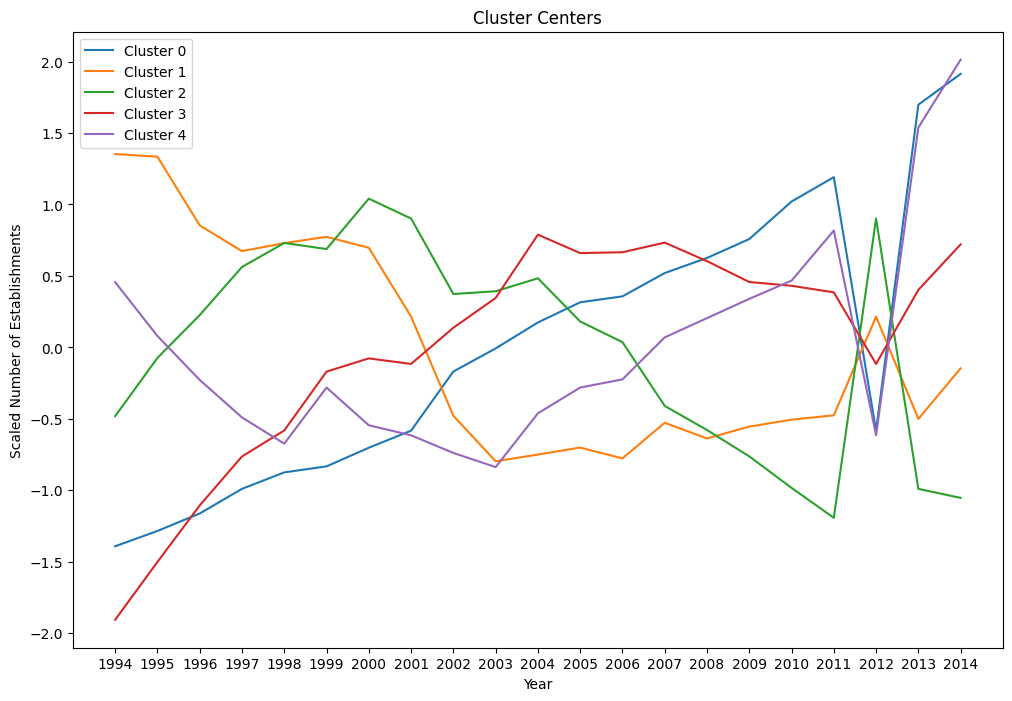

In [54]:
#plot just the centers here
plt.figure(figsize=(12, 8))
for i in range(nc):
    plt.plot(df_imputed.columns, km.cluster_centers_[i], label=f'Cluster {i}')
plt.xlabel('Year')
plt.ylabel('Scaled Number of Establishments')
plt.title('Cluster Centers')
plt.legend()
plt.show()


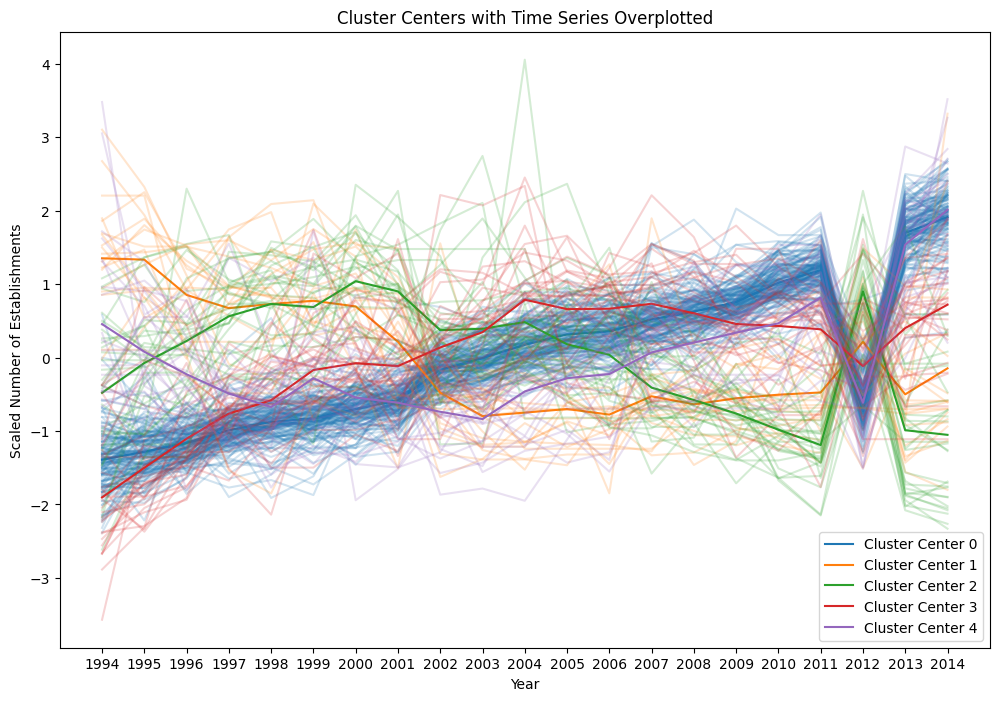

In [55]:
# prompt: plot also the time series that belong to the cluster, overplotting them on the cluster center

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'km' is your KMeans model and 'vals' is your scaled data
# and 'df_imputed' is your original data frame

plt.figure(figsize=(12, 8))

for i in range(nc):
    # Plot cluster centers
    plt.plot(df_imputed.columns, km.cluster_centers_[i], label=f'Cluster Center {i}')

    # Find time series belonging to the current cluster
    cluster_indices = np.where(km.labels_ == i)
    cluster_time_series = vals[cluster_indices]

    # Overplot the time series in the cluster with lower opacity
    for ts in cluster_time_series:
        plt.plot(df_imputed.columns, ts, color=f'C{i}', alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Scaled Number of Establishments')
plt.title('Cluster Centers with Time Series Overplotted')
plt.legend()
plt.show()


Then plot also the time series that belong to the cluster, overplotting them on the cluster center (cluster center in blue, alpha=1, time series in black, alpha=0.3). The time series in a cluster can be found as km.labe

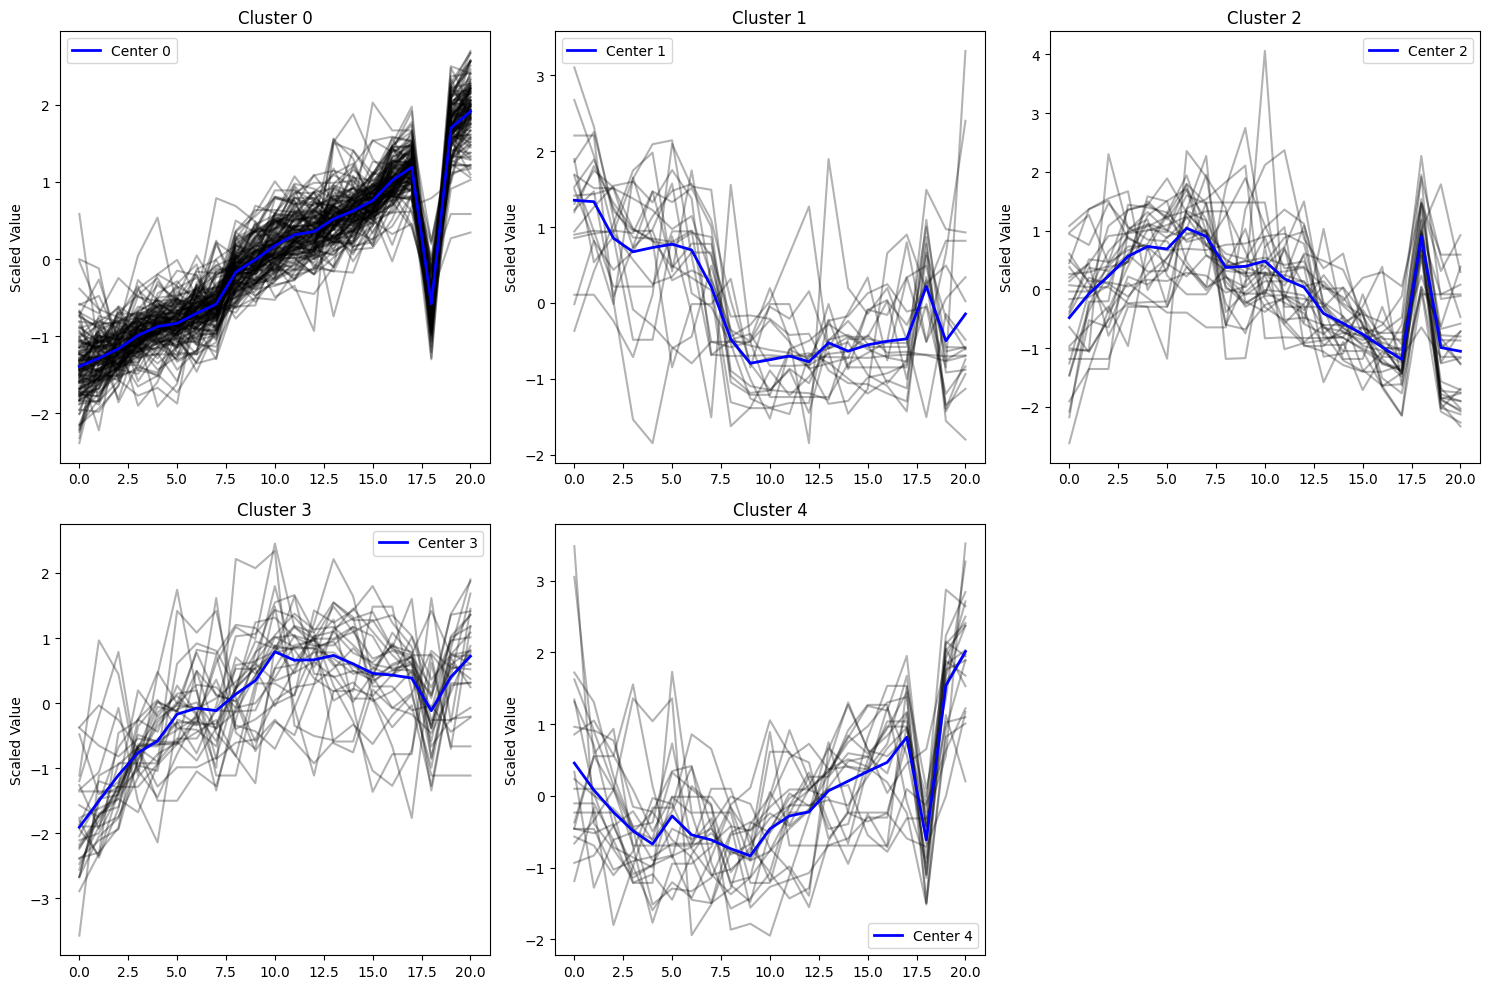

In [56]:
# prompt: Plot the time series belonging to each cluster in its own subplot. make sure to highlight the center in each subplot

# Plot the time series belonging to each cluster in its own subplot
plt.figure(figsize=(15, 10))

for i in range(nc):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    cluster_indices = np.where(km.labels_ == i)[0]
    cluster_data = vals[cluster_indices, :]

    for ts in cluster_data:
        plt.plot(ts, color='black', alpha=0.3)

    plt.plot(km.cluster_centers_[i], color='blue', linewidth=2, label=f'Center {i}', alpha = 1)

    plt.ylabel('Scaled Value')
    plt.title(f'Cluster {i}')
    plt.legend()

plt.tight_layout()
plt.show()

Map the zipcodes by color according to the cluster center - you can make a single map in 5 color or 5 maps in 1 color each


In [57]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = km.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [58]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


<ipython-input-59-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-59-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-59-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-59-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-59-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

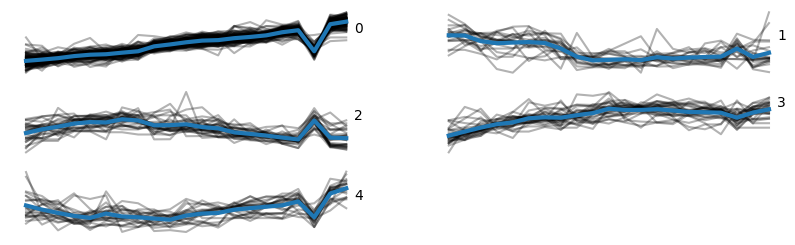

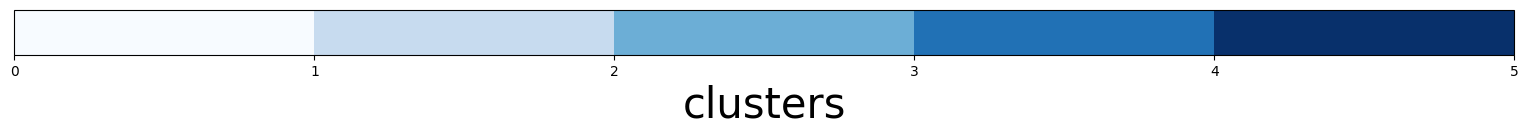

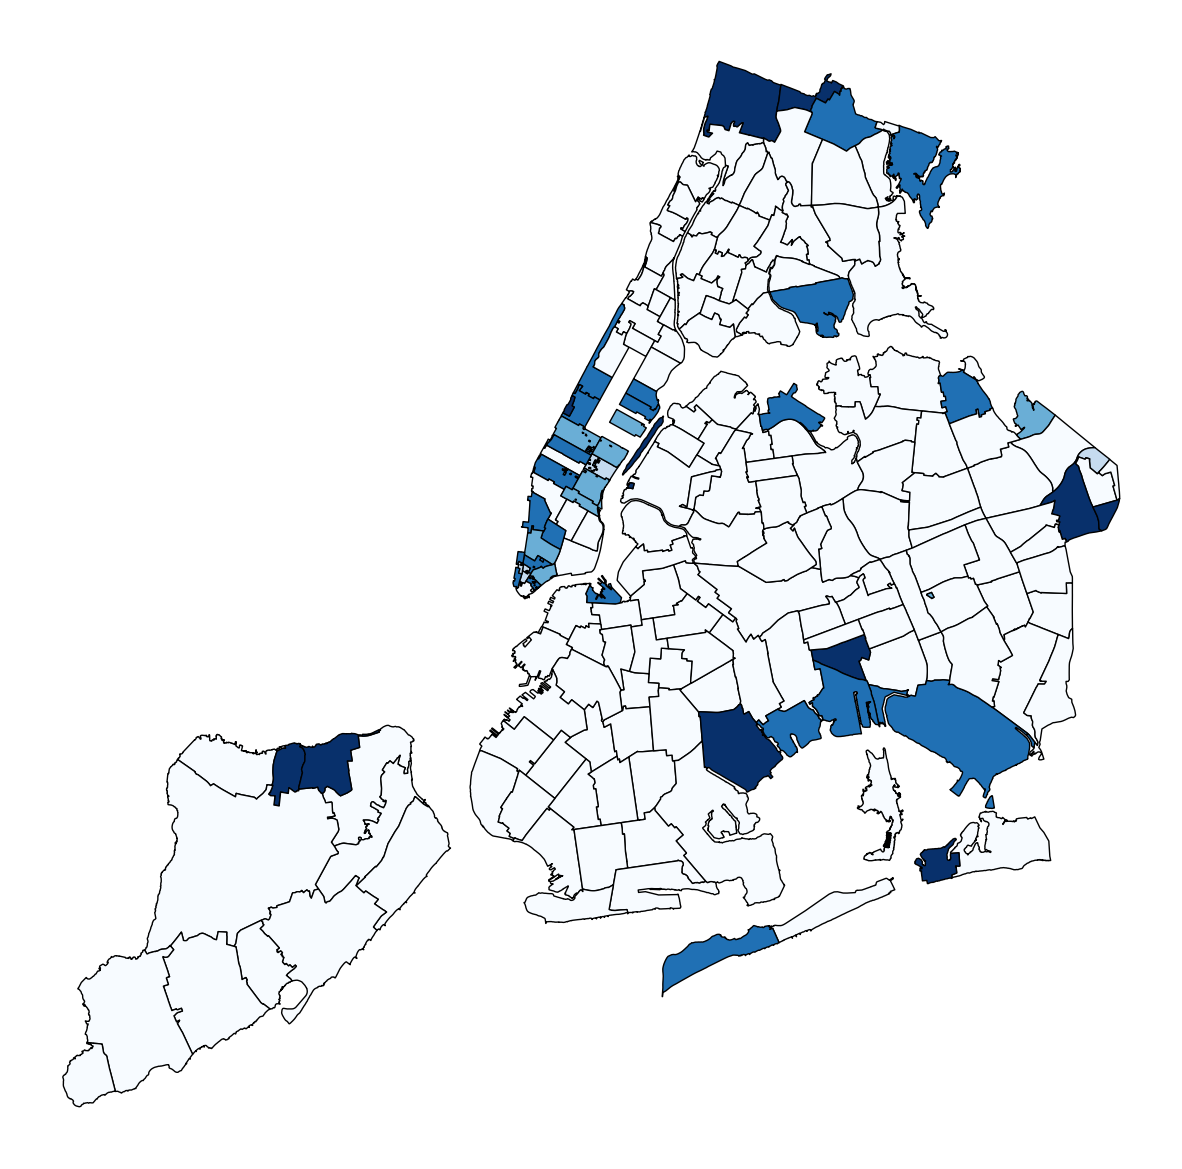

In [59]:
import matplotlib as mpl
fig = plt.figure(figsize=(10, 5))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    plt.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
    plt.grid(False)
    plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Blues', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

### Figure 3:
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

Can you parse some business and socioeconomic dynamics from this plot?

create 8 kmeans models with 2-10 cluster centers. put each model in a list

(array([0, 1], dtype=int32), array([183,  56]))
(array([0, 1, 2], dtype=int32), array([180,  26,  33]))
(array([0, 1, 2, 3], dtype=int32), array([150,  26,  32,  31]))
(array([0, 1, 2, 3, 4], dtype=int32), array([142,  19,  29,  28,  21]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([142,  20,  25,   7,  21,  24]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([138,  20,  22,   9,  17,  25,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([136,  22,  14,  13,  10,  17,  19,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([96, 22, 13, 12, 10, 11, 16,  8, 51]))


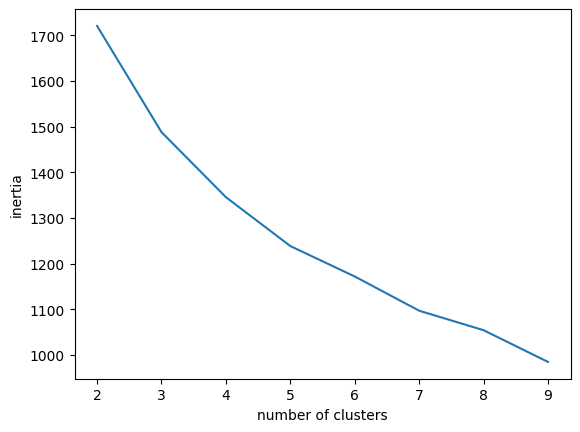

In [60]:
kms = []
for nc in range(2,10):
  #cluster with kmeans
  kms.append(KMeans(n_clusters=nc, random_state=302).fit(vals))
#each observation in the km object has a label:
#that is the cluster assigned to that observation
for km in kms:
  print(np.unique(km.labels_, return_counts=True))
import pylab as plt
plt.plot(range(2,10), [km.inertia_ for km in kms])
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

QUESTION: was the number $5$ clusters justified by the data? explain

The inertia plot looks smooth and does not have a clear elbow point. So determining if the choice $nc = 5$ is valid or not is not straightforward. However when clear elbowpoint is not present, often the least number of cluster is the best choice. For this dataset, DBSCAN too got only $2$ clusters. Hence $nc = 5$ might not be the best choice.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

# repeating the exercise using DBSCAN or hyerarchical agglomerative clustring...

(array([-1,  0]), array([107, 132]))


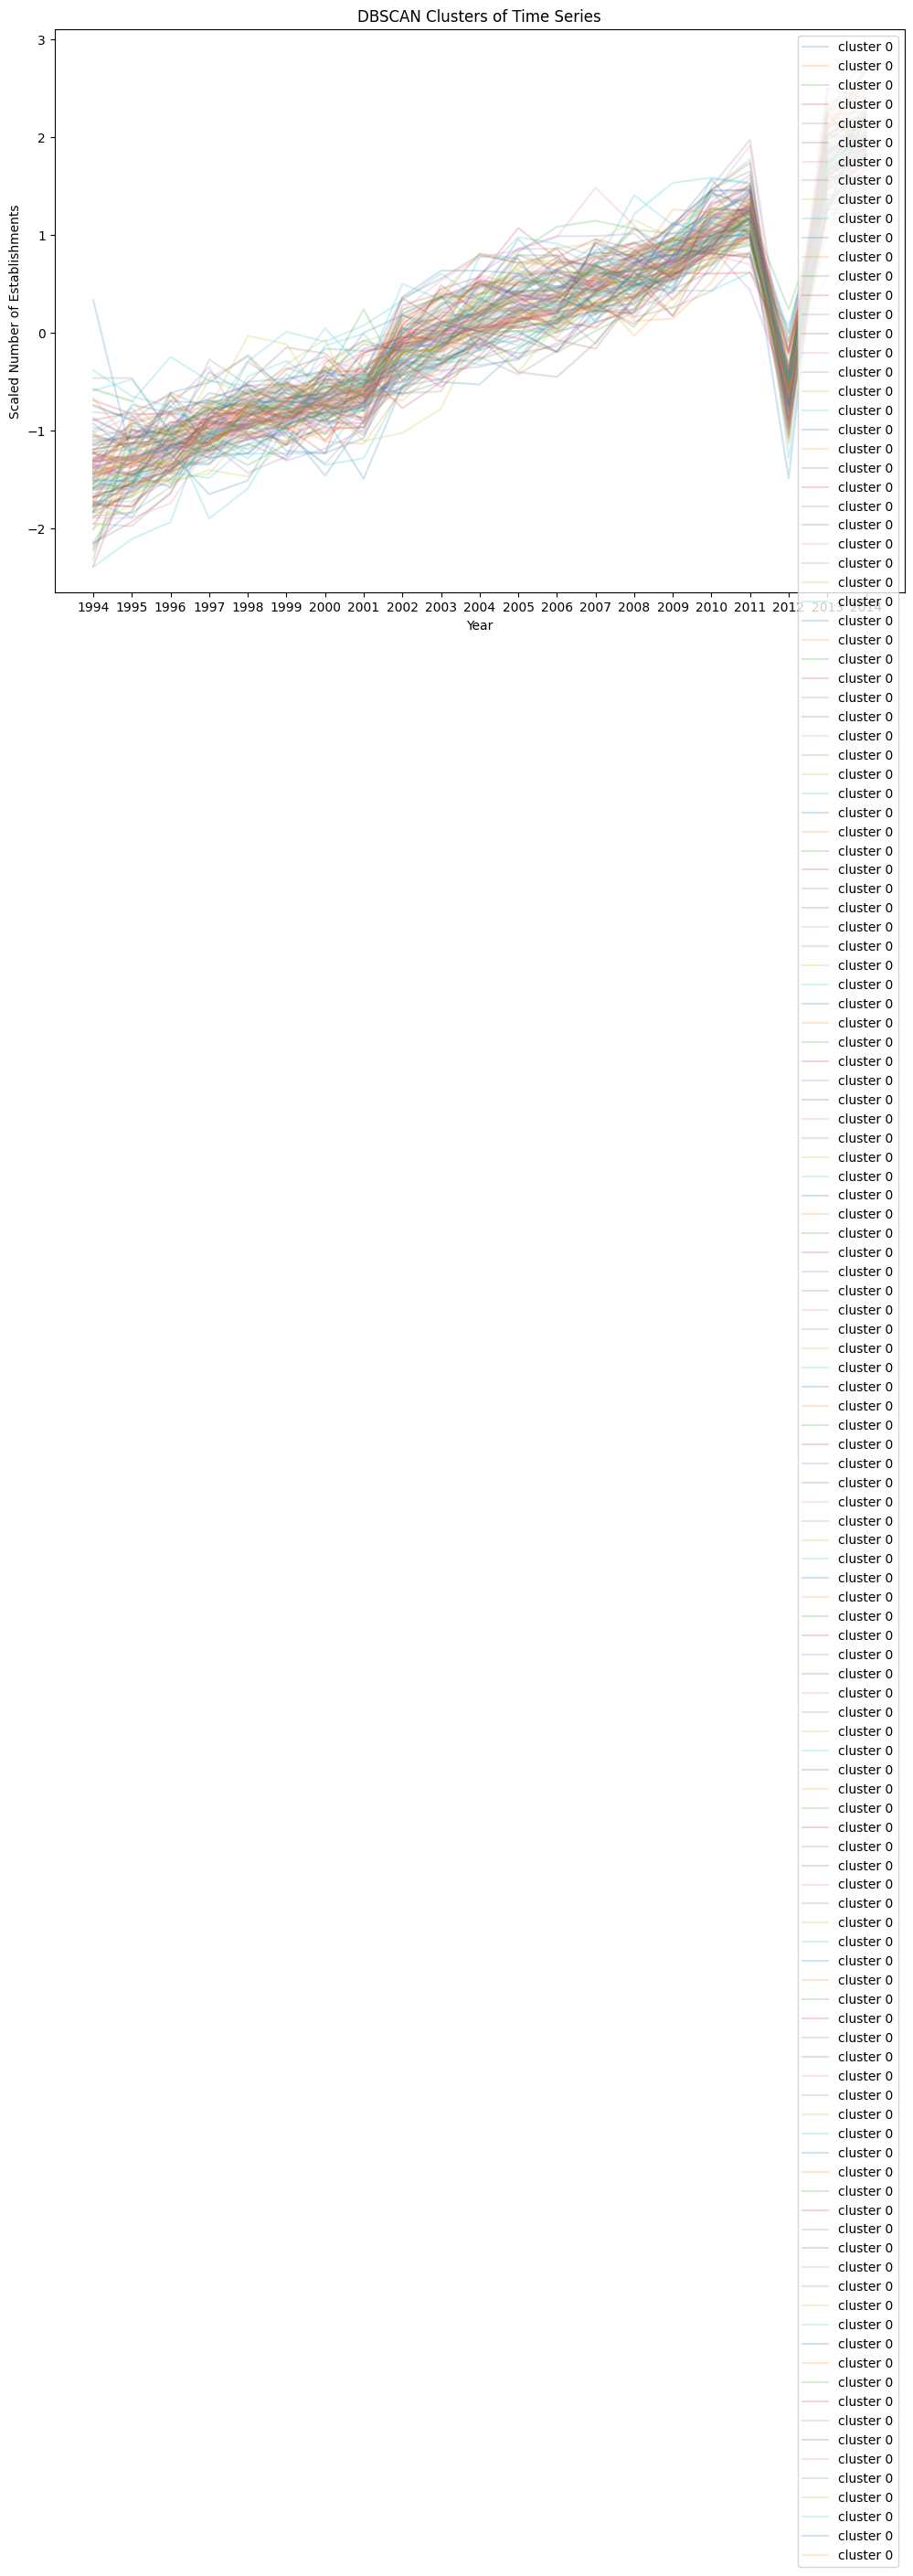

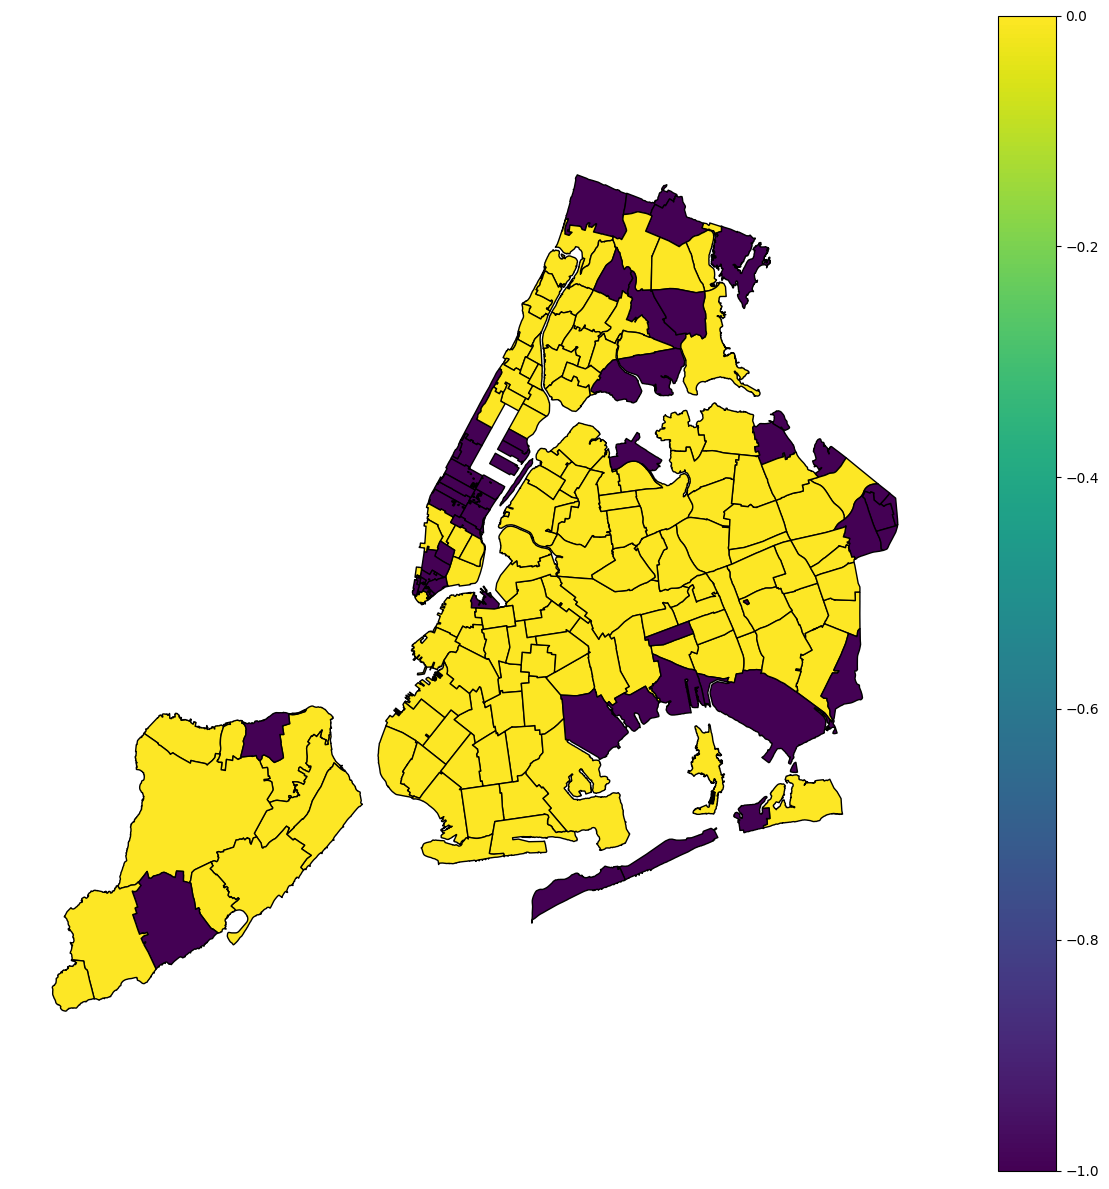

In [61]:
# prompt: Use DBSCAN to cluster df_scaled.

# Assuming 'vals' is your scaled data
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(vals) # You might need to tune eps and min_samples

# Now you can use dbscan.labels_ to get the cluster labels for each data point
# dbscan.labels_ will have -1 for noise points and cluster numbers (0, 1, 2, ...) for the other points
print(np.unique(dbscan.labels_, return_counts=True))

# Example of plotting the clusters
plt.figure(figsize=(12, 8))

# Assuming vals are your scaled time series
for i in np.unique(dbscan.labels_):
    if i != -1: # Exclude noise points
        cluster_indices = np.where(dbscan.labels_ == i)
        cluster_time_series = vals[cluster_indices]

        for ts in cluster_time_series:
          plt.plot(df_imputed.columns, ts, alpha = 0.2, label = f"cluster {i}" if i == 0 else "")

plt.xlabel('Year')
plt.ylabel('Scaled Number of Establishments')
plt.title('DBSCAN Clusters of Time Series')
plt.legend()
plt.show()


# Create a dataframe with the cluster id per zipcode for DBSCAN
clustersdf_dbscan = pd.DataFrame()
clustersdf_dbscan['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf_dbscan['cluster'] = dbscan.labels_

# Merge with the geodataframe
mergednyz_dbscan = nyczipsshp.merge(clustersdf_dbscan, on='ZIPCODE', how='inner')

#Plot the map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

# Use a colormap that handles -1 (noise) gracefully.
mergednyz_dbscan.plot(column='cluster', cmap='viridis', alpha=1, ax=ax, ec='k', legend=True, missing_kwds={'color': 'lightgrey'}) #missing_kwds for noise

ax.axis('off')
plt.show()


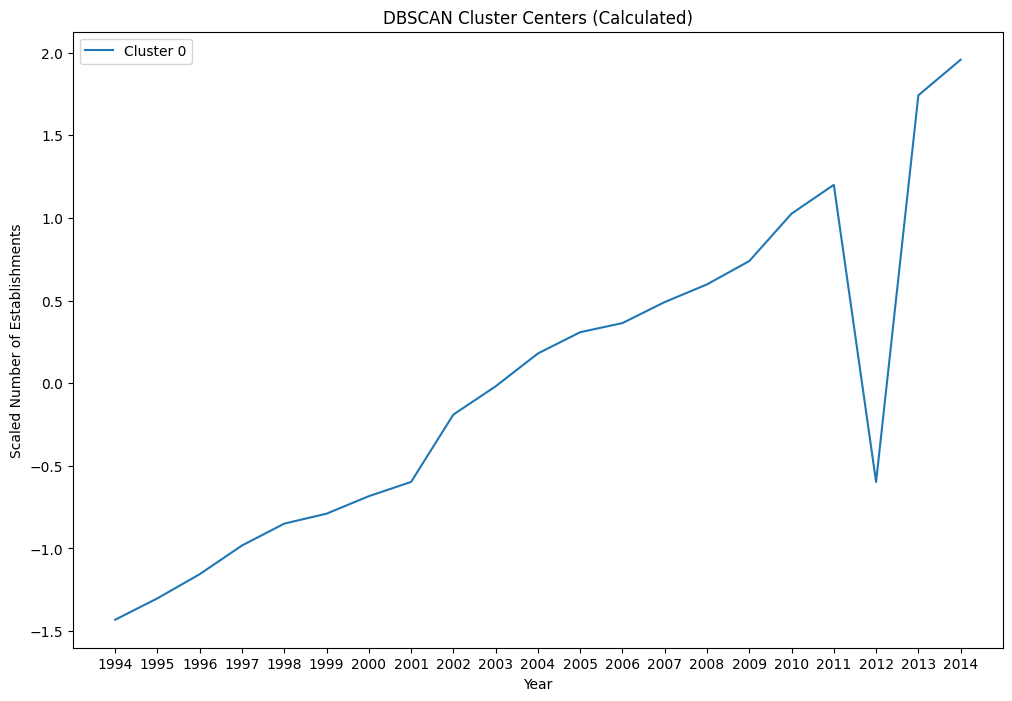

In [62]:
# Get cluster labels and indices
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters, excluding noise
cluster_indices = [np.where(labels == i)[0] for i in range(n_clusters)]

# Calculate cluster centers (mean of data points in each cluster)
cluster_centers = [vals[cluster_idx].mean(axis=0) for cluster_idx in cluster_indices]

# Plot cluster centers
plt.figure(figsize=(12, 8))
for i, center in enumerate(cluster_centers):
    plt.plot(df_imputed.columns, center, label=f'Cluster {i}')

plt.xlabel('Year')
plt.ylabel('Scaled Number of Establishments')
plt.title('DBSCAN Cluster Centers (Calculated)')
plt.legend()
plt.show()

### Figure 9:
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [76]:
# prompt: Create a list named zipcodes by taking out all the zipcodes from nyczips that are not in df_imputed.

zipcodes = nyczips[np.isin(nyczips, df_imputed.index.astype(int))]
len(zipcodes)


239

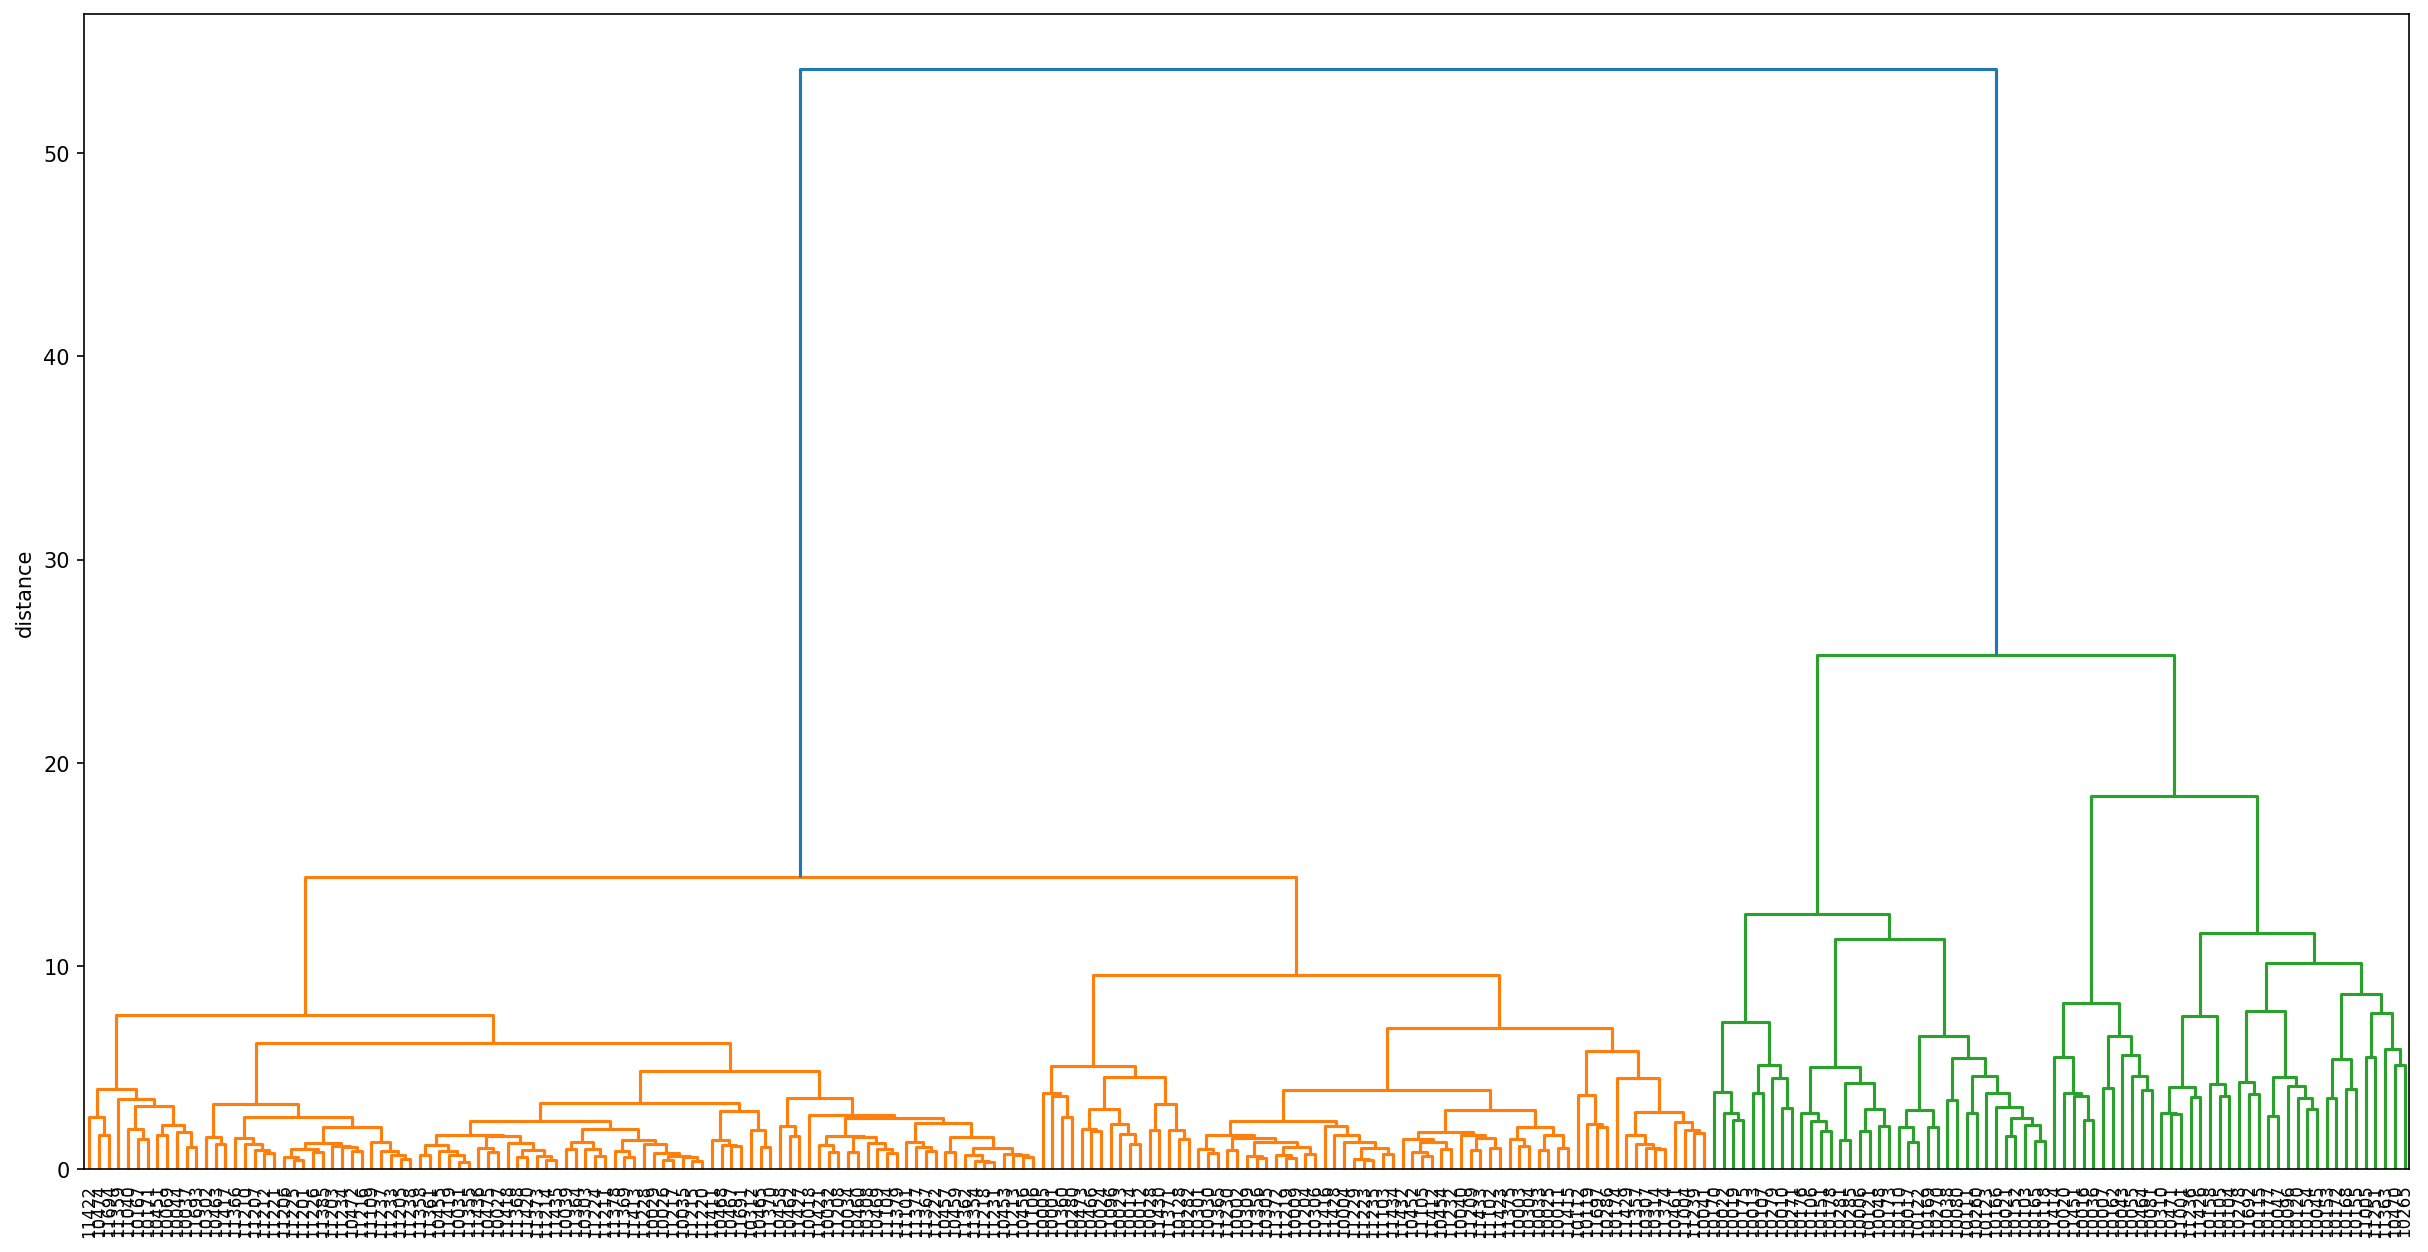

In [77]:
import scipy.cluster as scp
fig = plt.figure(figsize=(20,10), dpi=150)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)

In [78]:
!pwd

/content
